In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import emoji
import seaborn as sns
import nltk

C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
def process_chat(file_path):
    nltk.download('vader_lexicon')

    def clean_text(text):
        text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(,)|\\)|[\\]]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
        text = re.sub(r'<Media omitted>', '', text)
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        tokens = word_tokenize(text)
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word.lower() not in stop_words]
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]
        cleaned_text = ' '.join(tokens)
        return cleaned_text

    def analyze_sentiment(cleaned_message):
        sid = SentimentIntensityAnalyzer()
        return sid.polarity_scores(cleaned_message)['compound']

    file = open(file_path, 'r', encoding='utf-8')
    read = file.read()

    pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s*[ap]m\s-\s'
    messages = re.split(pattern, read)[1:]
    dates = re.findall(pattern, read)

    df = pd.DataFrame({'user_message': messages, 'message_date': dates})
    df['user'], df['message'] = zip(*[(entry[1], " ".join(entry[2:])) if entry[1:] else ('group_notification', entry[0]) for entry in [re.split('([\w\W]+?):\s', message) for message in df['user_message']]])

    df['date'] = [x.split(',')[0] for x in df['message_date']]
    df['time'] = [x.split(',')[1] for x in df['message_date']]
    df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
    df['time'] = pd.to_datetime(df['time'], format=' %H:%M %p - ')

    df = df.drop(columns='message_date')

    df['hour'] = df['time'].dt.hour
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month_name()
    df['day'] = df['date'].dt.day
    df['minute'] = df['time'].dt.minute

    df['cleaned_message'] = df['message'].apply(clean_text)
    df['sentiment_score'] = df['cleaned_message'].apply(analyze_sentiment)
    df['sentiment_category'] = df['sentiment_score'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

    return df


file_path = 'WhatsApp Chat with Maeen 😸 (1).txt'
df = process_chat(file_path)



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
total_messages = df.shape[0]
print('Total number of messages =', total_messages)

Total number of messages = 4854


In [10]:
total_messages_df = pd.DataFrame({'Total_Messages': [total_messages]})

In [14]:
# Save the DataFrame to a CSV file
total_messages_df.to_csv('E:/datasets/DATA/total_messages.csv', index=False)

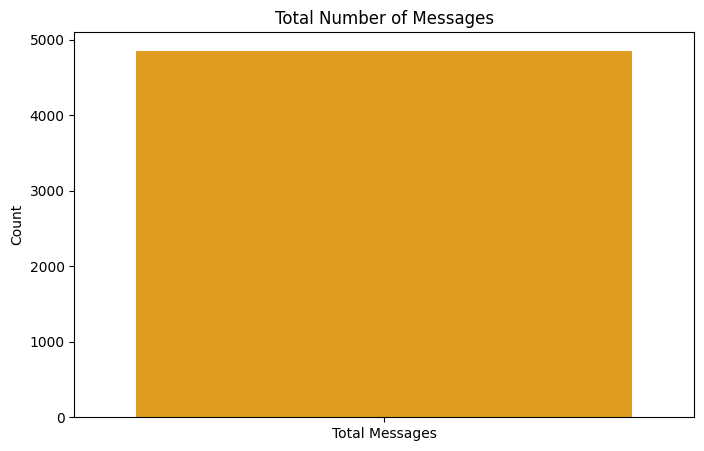

In [9]:
plt.figure(figsize=(8, 5))
sns.barplot(x=['Total Messages'], y=[total_messages], color='orange')
plt.title('Total Number of Messages')
plt.ylabel('Count')
plt.show()

In [24]:
sentiment = df['sentiment_category'].value_counts()

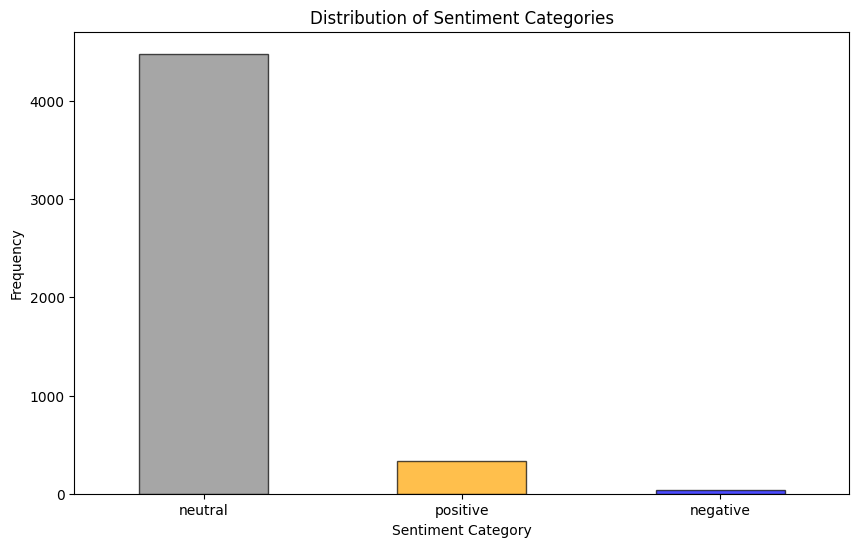

In [8]:
plt.figure(figsize=(10, 6))
df['sentiment_category'].value_counts().plot(kind='bar', color=['grey', 'orange', 'blue'], edgecolor='black', alpha=0.7)
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [9]:
sentiment_by_date = df.groupby(['month', 'sentiment_category']).size().unstack(fill_value=0)

In [10]:
print(sentiment_by_date)

sentiment_category  negative  neutral  positive
month                                          
April                      3      448        32
August                     2      312        17
December                   0      261        16
February                   1      522        57
January                    9      353        36
July                       3      345        15
June                       1      448        14
March                      2      274        11
May                       10      496        24
November                   2      417        49
October                    3      384        54
September                  1      220        12


In [12]:
user_counts = df['user'].value_counts()

In [13]:
user_counts

user
Api                   1136
Anty Jana              783
Namra                  585
Uz                     509
Akaa3                  368
Uzair                  333
Rizwan Bhiii           269
Najam                  260
Anty Gogiii...         201
Tauqeer Bhi(D)         144
Janiii                 106
Akaaa2                  68
Ehtsham                 51
group_notification      41
Name: count, dtype: int64

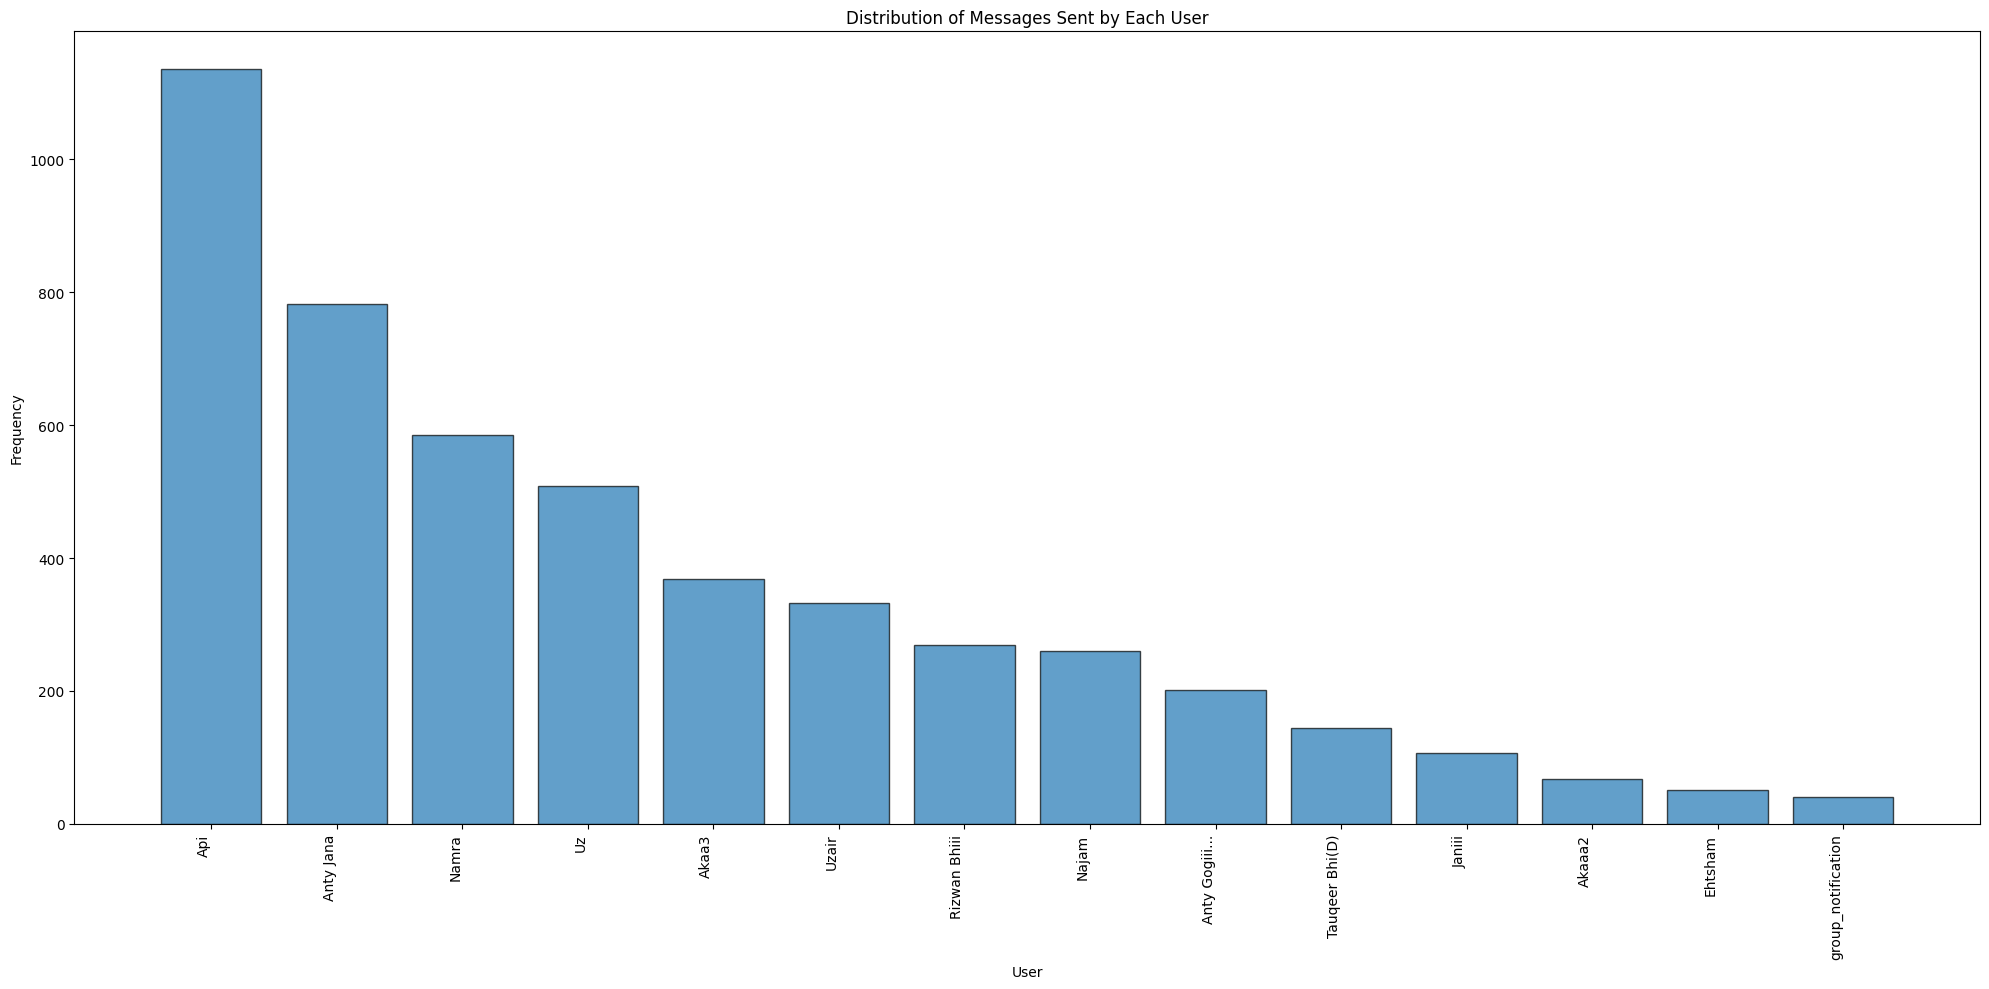

In [14]:
user_counts = df['user'].value_counts()

plt.figure(figsize=(20, 10))
plt.bar(user_counts.index, user_counts, edgecolor='black', alpha=0.7)
plt.title('Distribution of Messages Sent by Each User')
plt.xlabel('User')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [30]:
top_users = df['user'].value_counts().head()

In [31]:
top_users

user
Api          1136
Anty Jana     783
Namra         585
Uz            509
Akaa3         368
Name: count, dtype: int64

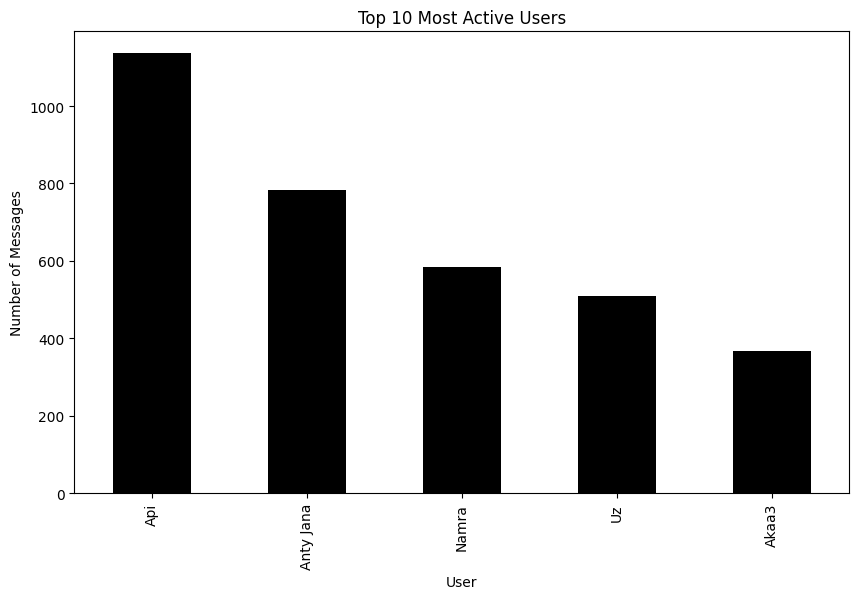

In [34]:
top_users = df['user'].value_counts().head(5)
plt.figure(figsize=(10, 6))
top_users.plot(kind='bar', color='black')
plt.title('Top 10 Most Active Users')
plt.xlabel('User')
plt.ylabel('Number of Messages')
plt.show()

In [37]:
df_daily_counts = pd.DataFrame({'Day_of_Week': daily_message_counts.index, 'Message_Count': daily_message_counts.values})

# Specify the file path where you want to save the CSV file
csv_file_path = "E:/datasets/DATA/daily_message_counts.csv"

# Save the DataFrame to a CSV file
df_daily_counts.to_csv(csv_file_path, index=False)

In [35]:
df['day_of_week'] = df['date'].dt.day_name()
daily_message_counts = df.groupby('day_of_week')['message'].count()

In [36]:
daily_message_counts

day_of_week
Friday       613
Monday       626
Saturday     882
Sunday       815
Thursday     704
Tuesday      578
Wednesday    636
Name: message, dtype: int64

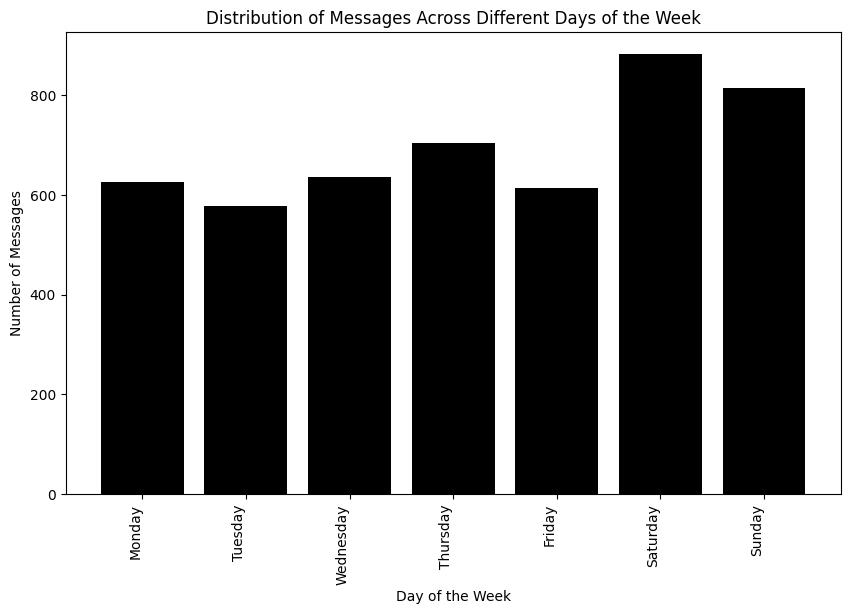

In [20]:
df['day_of_week'] = df['date'].dt.day_name()
daily_message_counts = df.groupby('day_of_week')['message'].count()
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_message_counts = daily_message_counts.reindex(days_order)
plt.figure(figsize=(10, 6))
plt.bar(daily_message_counts.index, daily_message_counts, color='black')
plt.title('Distribution of Messages Across Different Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Messages')
plt.xticks(rotation=90, ha='right')
plt.show()

In [21]:
all_messages = ' '.join(df['cleaned_message'])

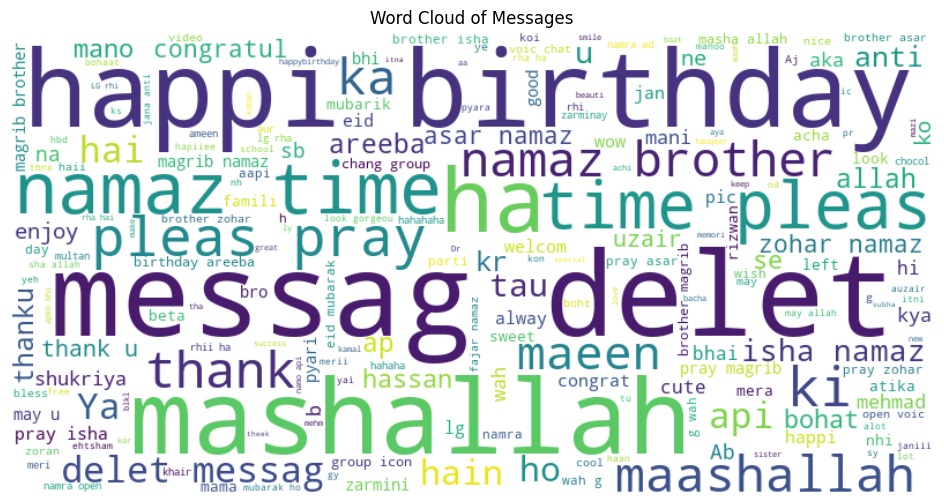

In [23]:
all_messages = ' '.join(df['cleaned_message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_messages)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Messages')
plt.show()

In [41]:
df_hourly_counts = pd.DataFrame({'Hour': hourly_message_counts.index, 'Message_Count': hourly_message_counts.values})

# Specify the file path where you want to save the CSV file
csv_file_path = "E:/datasets/DATA/hourly_message_counts.csv"

# Save the DataFrame to a CSV file
df_hourly_counts.to_csv(csv_file_path, index=False)

In [39]:
hourly_message_counts = df.groupby('hour')['message'].count()

In [40]:
hourly_message_counts

hour
1     296
2     303
3     162
4     319
5     394
6     407
7     537
8     405
9     646
10    536
11    486
12    363
Name: message, dtype: int64

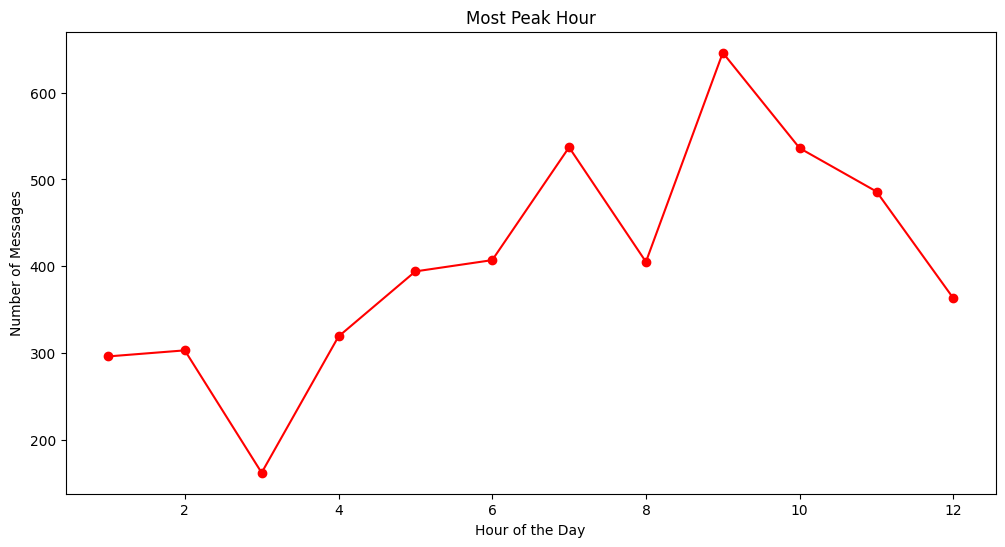

In [26]:
hourly_message_counts = df.groupby('hour')['message'].count()

plt.figure(figsize=(12, 6))
plt.plot(hourly_message_counts.index, hourly_message_counts, marker='o', linestyle='-', color='r')
plt.title('Most Peak Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Messages')
plt.show()

In [43]:
daily_activity = df.groupby('date')['message'].count()

In [44]:
daily_activity

date
2018-03-14     2
2018-11-03     9
2018-11-07    13
2018-11-08     8
2018-11-09     5
              ..
2023-11-08     2
2023-11-19     8
2023-11-22    14
2023-12-08    11
2023-12-12     1
Name: message, Length: 725, dtype: int64

In [45]:
df_daily_activity = pd.DataFrame({'Date': daily_activity.index, 'Message_Count': daily_activity.values})

# Specify the file path where you want to save the CSV file
csv_file_path = "E:/datasets/DATA/daily_activity_counts.csv"

# Save the DataFrame to a CSV file
df_daily_activity.to_csv(csv_file_path, index=False)

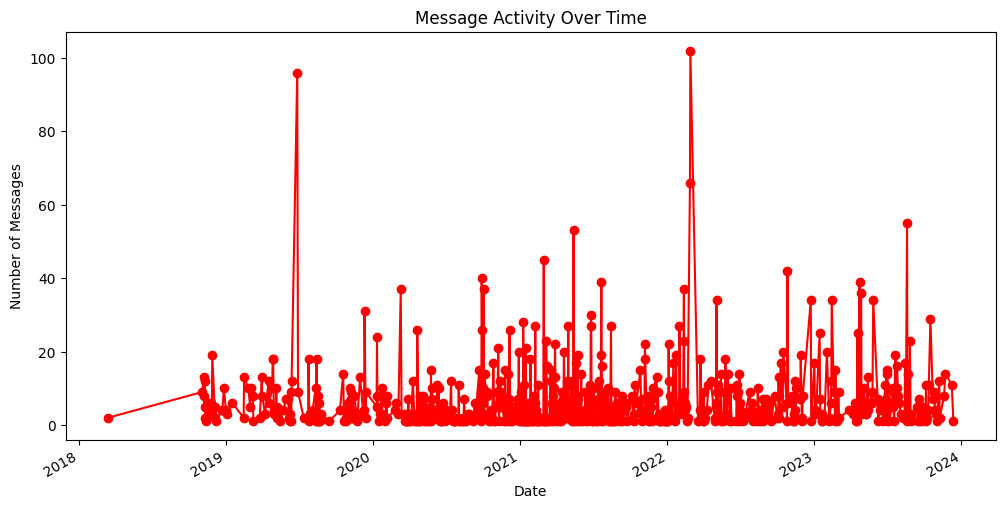

In [29]:
daily_activity = df.groupby('date')['message'].count()
plt.figure(figsize=(12, 6))
daily_activity.plot(marker='o', linestyle='-', color='r')
plt.title('Message Activity Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.show()

In [46]:
monthly_activity = df.groupby('month')['message'].count()

In [47]:
monthly_activity.sort_values(ascending=False)

month
February     580
May          530
April        483
November     468
June         463
October      441
January      398
July         363
August       331
March        287
December     277
September    233
Name: message, dtype: int64

In [48]:
df_monthly_activity = pd.DataFrame({'Month': monthly_activity.index, 'Message_Count': monthly_activity.values})

# Specify the file path where you want to save the CSV file
csv_file_path = "E:/datasets/DATA/monthly_activity_counts.csv"

# Save the DataFrame to a CSV file
df_monthly_activity.to_csv(csv_file_path, index=False)

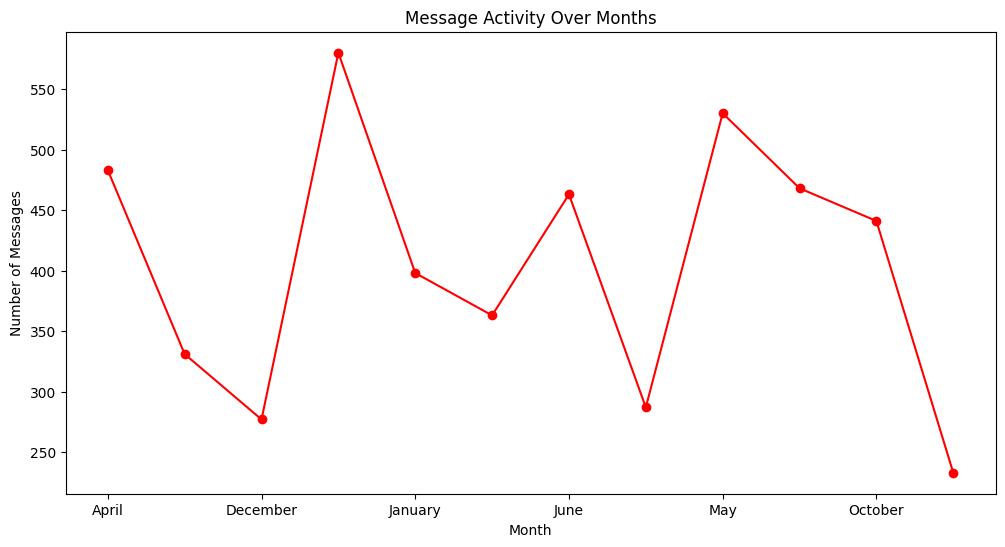

In [32]:
monthly_activity = df.groupby('month')['message'].count()
plt.figure(figsize=(12, 6))
monthly_activity.plot(marker='o', linestyle='-', color='r')
plt.title('Message Activity Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Messages')
plt.show()